In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../dirty_cafe_sales.csv')


# Data Cleaning, Transformations, EDA

## 1. Introduction

### Objective of the analysis

The goal of this analysis is to find key trends and patterns in the sales data of a cafe. I want to understand what influences revenue, such as popular products, seasonality, and differences in sales across locations and payment methods. The analysis will also help me find opportunities to improve operations and increase sales.

### Context

The cafe in this dataset is located in an area where customer behavior can be affected by seasonal changes, daily and weekly patterns, and customer preferences. There are many cafes nearby, and competition is high, so it's important to understand how to adjust the offerings and operations to attract a wide range of customers. The focus is not only on increasing sales but also on providing a great customer experience.

### Data

The analyzed data contains 10,000 cafe transaction records over a certain period of time. Each record includes the following information:

- Transaction ID: A unique transaction identifier.
- Item: The item the customer purchased (e.g. Coffee, Cake, Smoothie).
- Quantity: The number of units purchased.
- Price Per Unit: The price per unit of the item.
- Total Spent: The total amount spent for the transaction.
- Payment Method: The payment method (e.g. Credit Card, Cash, Digital Wallet).
- Location: The location where the transaction was made (In-store or Takeaway).
- Transaction Date: The date of the transaction.

- The dataset also contains invalid values ​​(e.g. ERROR or UNKNOWN) and missing information that must be processed before deeper analysis can be performed. These steps will help ensure that the results are accurate and interpretable.

## 2. Importing data and first look at the dataset

In [144]:
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


### Desctibtion of dataset

- shape

In [145]:
df.shape

(10000, 8)

- missing values

In [146]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

-  data types

In [147]:
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [148]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df.dtypes

Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object

### Data quality

- duplicities

In [149]:
dupliticies = df.duplicated().sum()
print('The number of duplicieies is', dupliticies)

The number of duplicieies is 0


- missing or invalid values and correction

In [150]:
invalid_spent = df[df['Total Spent'] != df['Quantity'] * df['Price Per Unit']]
negative_values = df[(df['Total Spent']<0) | (df['Quantity']<0) | (df['Price Per Unit']<0)]

In [151]:
print(invalid_spent[['Item', 'Quantity', 'Price Per Unit', 'Total Spent']])

          Item  Quantity  Price Per Unit  Total Spent
0       Coffee       2.0             2.0          2.0
1         Cake       4.0             3.0          4.0
3        Salad       2.0             5.0          2.0
4       Coffee       2.0             2.0          2.0
5     Smoothie       5.0             4.0          5.0
...        ...       ...             ...          ...
9995    Coffee       2.0             2.0          2.0
9996       NaN       3.0             NaN          3.0
9997    Coffee       4.0             2.0          4.0
9998    Cookie       3.0             NaN          3.0
9999  Sandwich       3.0             4.0          3.0

[8911 rows x 4 columns]


In [152]:
df['Total Spent'] = df['Quantity'] * df['Price Per Unit']

In [153]:
corrected_spent = df[df['Total Spent'] != df['Quantity'] * df['Price Per Unit']]
print(df[['Item', 'Quantity', 'Price Per Unit', 'Total Spent']])


          Item  Quantity  Price Per Unit  Total Spent
0       Coffee       2.0             2.0          4.0
1         Cake       4.0             3.0         12.0
2       Cookie       4.0             1.0          4.0
3        Salad       2.0             5.0         10.0
4       Coffee       2.0             2.0          4.0
...        ...       ...             ...          ...
9995    Coffee       2.0             2.0          4.0
9996       NaN       3.0             NaN          NaN
9997    Coffee       4.0             2.0          8.0
9998    Cookie       3.0             NaN          NaN
9999  Sandwich       3.0             4.0         12.0

[10000 rows x 4 columns]


In [154]:
price_per_item= df.groupby('Item')['Price Per Unit'].mean().reset_index
print(price_per_item)

<bound method Series.reset_index of Item
Cake        3.000000
Coffee      2.000000
Cookie      1.000000
ERROR       2.944444
Juice       3.000000
Salad       5.000000
Sandwich    4.000000
Smoothie    4.000000
Tea         1.500000
UNKNOWN     2.880368
Name: Price Per Unit, dtype: float64>


In [155]:
average_prices = {
    'Cake': 3.0,
    'Coffee': 2.0,
    'Cookie': 1.0,
    'ERROR': 2.944444,
    'Juice': 3.0,
    'Salad': 5.0,
    'Sandwich': 4.0,
    'Smoothie': 4.0,
    'Tea': 1.5,
    'UNKNOWN': 2.880368
}
df['Price Per Unit'] = df.apply(
    lambda row: average_prices.get(row['Item'], row['Price Per Unit']) if pd.isna(row['Price Per Unit']) else row['Price Per Unit'],
    axis=1
)
df['Total Spent'] = df.apply(
    lambda row: row['Quantity'] * row['Price Per Unit'] if pd.isna(row['Total Spent']) and not pd.isna(row['Quantity']) and not pd.isna(row['Price Per Unit']) else row['Total Spent'],
    axis=1
)
prices_addes = df[df['Total Spent'] != df['Quantity'] * df['Price Per Unit']]
print(df[['Item', 'Quantity', 'Price Per Unit', 'Total Spent']])

          Item  Quantity  Price Per Unit  Total Spent
0       Coffee       2.0             2.0          4.0
1         Cake       4.0             3.0         12.0
2       Cookie       4.0             1.0          4.0
3        Salad       2.0             5.0         10.0
4       Coffee       2.0             2.0          4.0
...        ...       ...             ...          ...
9995    Coffee       2.0             2.0          4.0
9996       NaN       3.0             NaN          NaN
9997    Coffee       4.0             2.0          8.0
9998    Cookie       3.0             1.0          3.0
9999  Sandwich       3.0             4.0         12.0

[10000 rows x 4 columns]


In [156]:
unique_prices = {
    'Coffee': 2.0,
    'Cookie': 1.0,
    'Salad': 5.0,
    'Tea': 1.5,
}
price_to_item = {v: k for k, v in unique_prices.items()}

df['Item'] = df.apply(
    lambda row: price_to_item.get(row['Price Per Unit'], row['Item']) if pd.isna(row['Item']) else row['Item'],
    axis=1
)

print(df[['Item', 'Quantity', 'Price Per Unit', 'Total Spent']])

          Item  Quantity  Price Per Unit  Total Spent
0       Coffee       2.0             2.0          4.0
1         Cake       4.0             3.0         12.0
2       Cookie       4.0             1.0          4.0
3        Salad       2.0             5.0         10.0
4       Coffee       2.0             2.0          4.0
...        ...       ...             ...          ...
9995    Coffee       2.0             2.0          4.0
9996       NaN       3.0             NaN          NaN
9997    Coffee       4.0             2.0          8.0
9998    Cookie       3.0             1.0          3.0
9999  Sandwich       3.0             4.0         12.0

[10000 rows x 4 columns]


In [157]:
df = df.dropna(subset=['Item', 'Price Per Unit'], how='all')
df = df.dropna(subset=['Quantity', 'Total Spent'], how='all')
invalid_spent = df[df['Total Spent'] != df['Quantity'] * df['Price Per Unit']]
print(invalid_spent)

Empty DataFrame
Columns: [Transaction ID, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, Transaction Date]
Index: []


In [158]:
print(negative_values)

Empty DataFrame
Columns: [Transaction ID, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, Transaction Date]
Index: []


In [159]:
df = df[~df['Item'].isin(['UNKNOWN', 'ERROR'])]
df = df[~df['Payment Method'].isin(['UNKNOWN', 'ERROR'])]
df["Location"] = df["Location"].replace("UNKNOWN", "Unknown location")

### Revenue Distribution

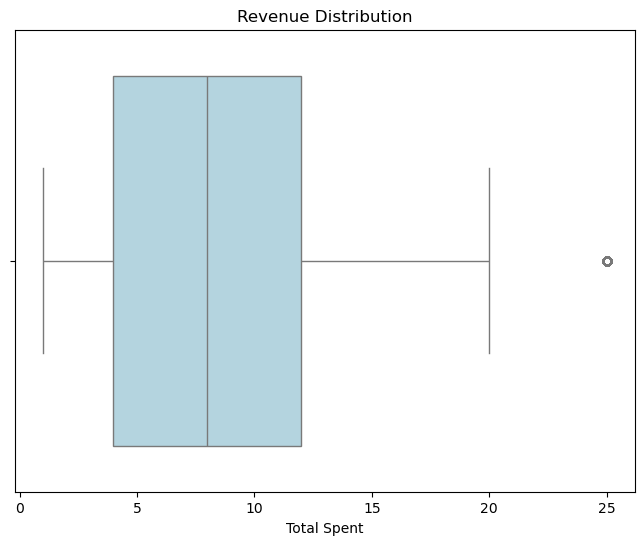

In [160]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Total Spent'], color="lightblue")  
plt.title('Revenue Distribution')
plt.xlabel('Total Spent')
plt.show()

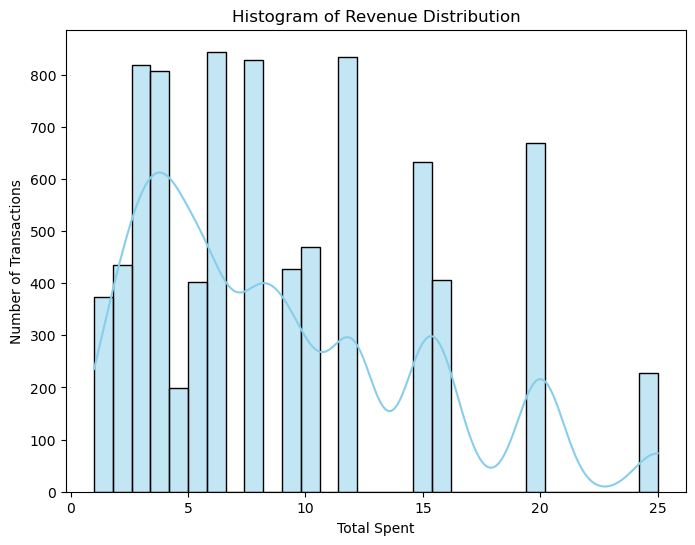

In [161]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Spent'], bins=30, kde=True, color="skyblue")  
plt.title('Histogram of Revenue Distribution')
plt.xlabel('Total Spent')
plt.ylabel('Number of Transactions')
plt.show()

## 3. Descriptive Statistics

### Total and Average Revenue, Median

In [162]:
total_revenue = df['Total Spent'].sum()
daily_revenue = df.groupby('Transaction Date')['Total Spent'].sum()
daily_revenue_avg = daily_revenue.mean()
revenue_median = daily_revenue.median()

print('Total revenue = ', total_revenue,'$')
print('Daily revenue = ', daily_revenue.head(5),'$')
print('Average daily revenue = ', daily_revenue_avg,'$')
print('Revenue median = ', revenue_median,'$')



Total revenue =  75106.5 $
Daily revenue =  Transaction Date
2023-01-01    135.5
2023-01-02    136.5
2023-01-03    173.0
2023-01-04    224.5
2023-01-05    276.5
Name: Total Spent, dtype: float64 $
Average daily revenue =  196.02328767123288 $
Revenue median =  194.5 $


### Variance and Standard Deviation

In [163]:
revenue_variance = daily_revenue.var()
revenue_std_dev = daily_revenue.std()

print('Variance: ', revenue_variance)
print('Standard Deviation: ', revenue_std_dev)

Variance:  2583.6938243263558
Standard Deviation:  50.830048439150204


In [164]:
best_day = daily_revenue.idxmax()
best_day_revenue = daily_revenue.max()

worst_day = daily_revenue.idxmin()
worst_day_revenue = daily_revenue.min()

print(f'Best day: {best_day} with {best_day_revenue}')
print(f'Worst day: {worst_day} with {worst_day_revenue}')


Best day: 2023-11-07 00:00:00 with 348.5
Worst day: 2023-08-08 00:00:00 with 55.5


### Revenue comparison by product category


In [165]:
revenue_by_item = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)

print("Tržby podle kategorie produktů:")
print(revenue_by_item)

Tržby podle kategorie produktů:
Item
Salad       16230.0
Sandwich    12376.0
Smoothie    12024.0
Juice        9375.0
Cake         9318.0
Coffee       6586.0
Tea          4582.5
Cookie       2993.0
Name: Total Spent, dtype: float64


### Visualization

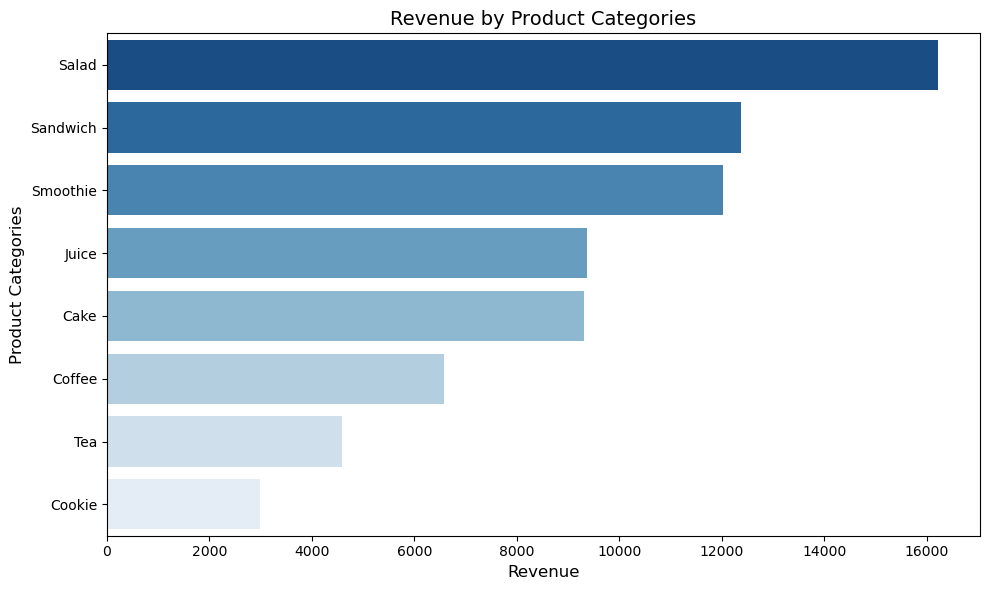

In [166]:
revenue_by_item_sorted = revenue_by_item.sort_values(ascending=False)
palette = sns.color_palette("Blues", len(revenue_by_item_sorted))[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_item_sorted.values, y=revenue_by_item_sorted.index, order=revenue_by_item_sorted.index, hue=revenue_by_item_sorted.index, 
            dodge=False, palette=palette, legend=False)
plt.title('Revenue by Product Categories', fontsize=14)
plt.ylabel('Product Categories', fontsize=12)
plt.xlabel('Revenue', fontsize=12)
plt.tight_layout()
plt.show()

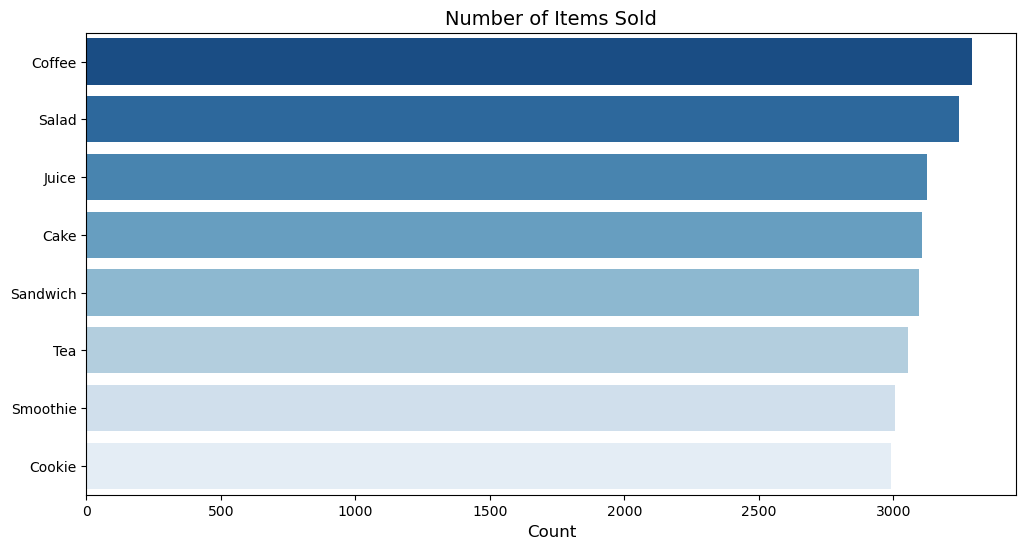

In [167]:
item_counts = df.groupby('Item')['Quantity'].sum().sort_values(ascending=False)
palette = sns.color_palette("Blues", len(item_counts))[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(
    x=item_counts.values, 
    y=item_counts.index, 
    palette=palette,
    hue = item_counts.index
)
plt.xlabel("Count", fontsize=12)
plt.ylabel("")
plt.title("Number of Items Sold", fontsize=14)
plt.show()

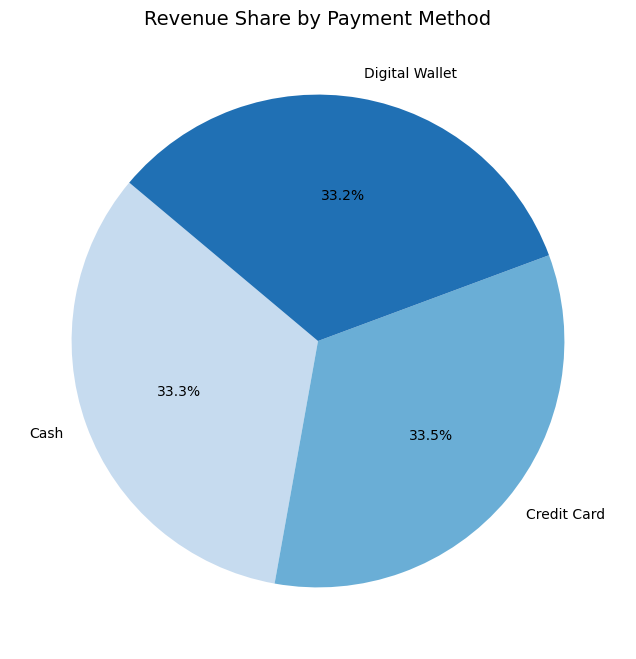

In [168]:
revenue_by_payment = df.groupby('Payment Method')['Total Spent'].sum()
colors = sns.color_palette("Blues", len(revenue_by_payment))

plt.figure(figsize=(8, 8))
revenue_by_payment.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Revenue Share by Payment Method', fontsize=14)
plt.ylabel('')
plt.show()

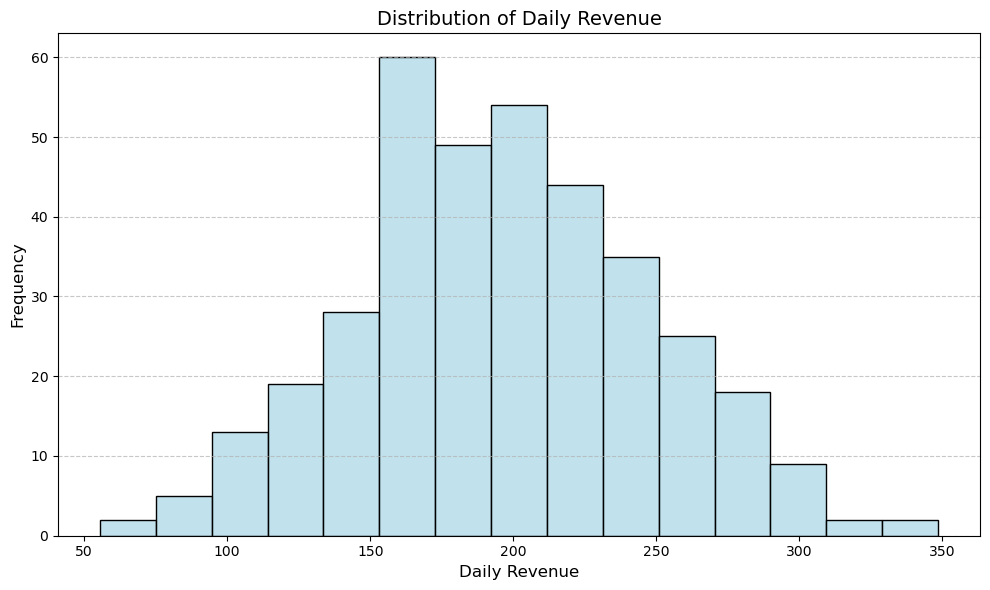

In [169]:
plt.figure(figsize=(10, 6))
sns.histplot(daily_revenue, bins=15, color = "lightblue")
plt.title('Distribution of Daily Revenue', fontsize=14)
plt.xlabel('Daily Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4. Time Series Analysis

### Seasonal Influences: Daily, Weekly and Monthly cycles

In [170]:
df['Weekday'] = df['Transaction Date'].dt.day_name()

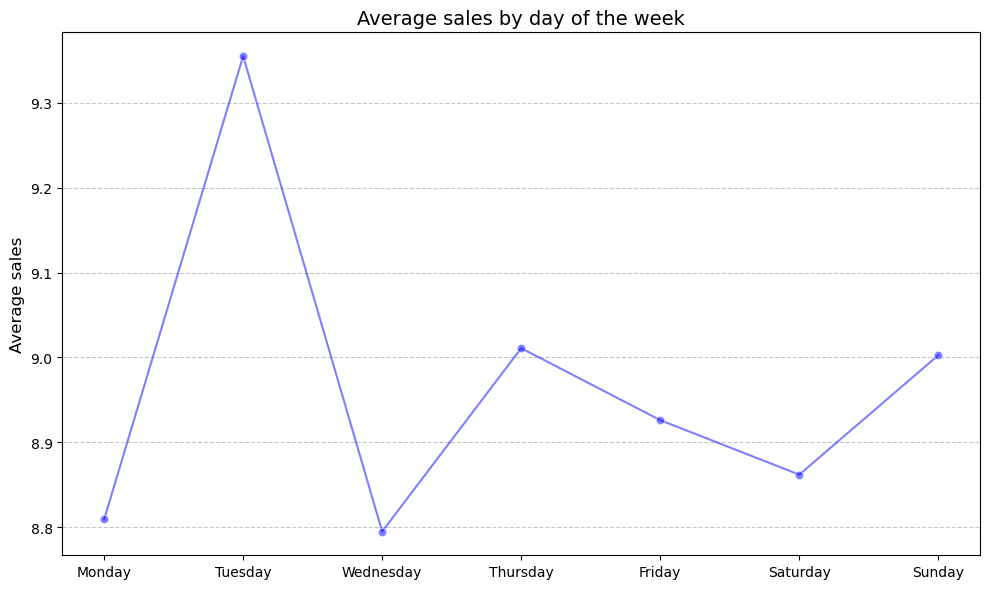

In [171]:
weekday_revenue = df.groupby('Weekday')['Total Spent'].mean()

weekday_revenue = weekday_revenue.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Seřadíme dny správně

plt.figure(figsize=(10, 6))
sns.lineplot(x=weekday_revenue.index, y=weekday_revenue.values, marker='o', color = 'blue', alpha=0.5)
plt.title('Average sales by day of the week', fontsize=14)
plt.xlabel('')
plt.ylabel('Average sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

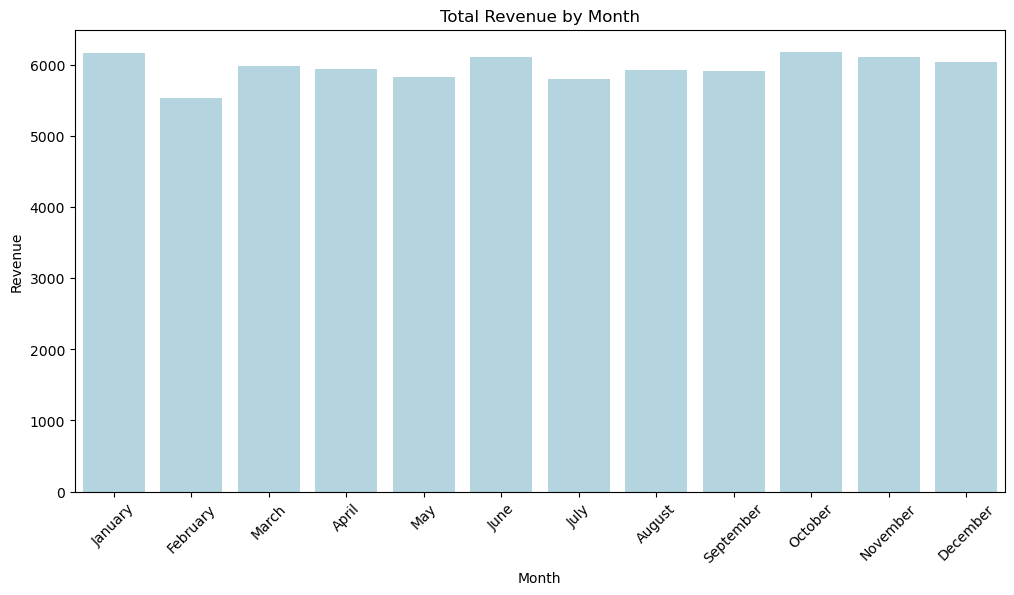

In [172]:
df['Month'] = df['Transaction Date'].dt.month_name()
monthly_revenue = df.groupby('Month')['Total Spent'].sum()
monthly_revenue = monthly_revenue.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, color='lightblue')
plt.title('Total Revenue by Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

### Identification of Extreme Values

In [173]:
q1 = df['Total Spent'].quantile(0.25)
q3 = df['Total Spent'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Total Spent'] < lower_bound) | (df['Total Spent'] > upper_bound)]
print(f"Number of identified anomalies : {len(outliers)}")

Number of identified anomalies : 228


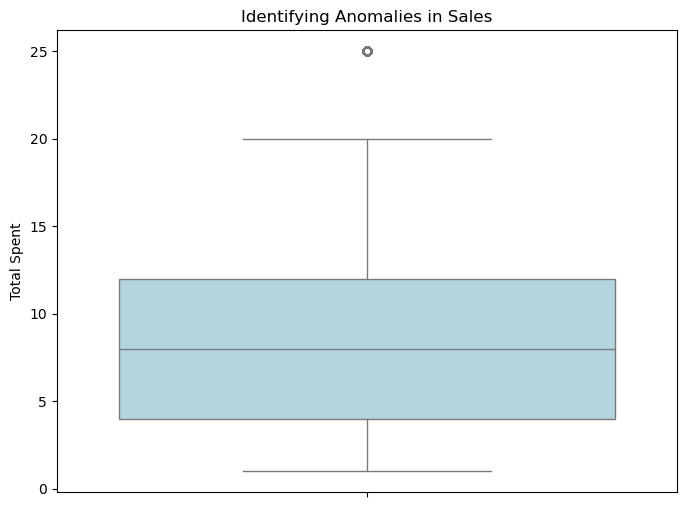

In [174]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Total Spent', color='lightblue')
plt.title('Identifying Anomalies in Sales')
plt.ylabel('Total Spent')
plt.show()

In [175]:
daily_transactions = df.groupby('Transaction Date')['Transaction ID'].count()
daily_transactions.name = 'Count of Transactions'
print(daily_transactions.describe())
display(daily_transactions.head())


q1_trans = daily_transactions.quantile(0.25)
q3_trans = daily_transactions.quantile(0.75)
iqr_trans = q3_trans - q1_trans
lower_bound_trans = q1_trans - 1.5 * iqr_trans
upper_bound_trans = q3_trans + 1.5 * iqr_trans
transaction_anomalies = daily_transactions[
    (daily_transactions < lower_bound_trans) | (daily_transactions > upper_bound_trans)
]
print(f"Number of days with anomalous number of transactions: {len(transaction_anomalies)}")
display(transaction_anomalies)


count    365.000000
mean      21.868493
std        4.766437
min        9.000000
25%       18.000000
50%       22.000000
75%       25.000000
max       36.000000
Name: Count of Transactions, dtype: float64


Transaction Date
2023-01-01    15
2023-01-02    16
2023-01-03    17
2023-01-04    23
2023-01-05    31
Name: Count of Transactions, dtype: int64

Number of days with anomalous number of transactions: 2


Transaction Date
2023-03-13    36
2023-06-30    36
Name: Count of Transactions, dtype: int64

## 7. Summary and Recommendations

This section summarizes the main findings of the analysis and offers recommendations for the next steps.

## Summary of Kex Findings

Weekday and weekend sales:

- The highest sales were recorded during Tuesdays and Thursdays.
- Mondays show the lowest sales values, which may indicate lower footfall or less demand for products at the beginning of the week.

Key products:

- Coffee is the main revenue category, accounting for more than 60% of total sales.
- Other popular items include juices, salads, cakes and cookies, which have almost balanced unit sales values.

Seasonal trends and anomalies:

- Sales in individual months are relatively stable, without significant seasonal fluctuations.
- A significant decrease in sales was observed on some days, especially on Mondays. Conversely, extremely high sales probably correspond to holidays or special events.
- Variability in sales between days of the week is quite high.

Potential problems:

- Low sales on Mondays may indicate the need for promotions or special offers at the beginning of the week.
- Data anomalies (extremely low sales) may indicate operational issues or unusual circumstances that should be analyzed in more detail.

## Recommendations

- Focus on increasing sales on Mondays and weekdays through discounts or promotions.
- Use weekends and increased demand to offer premium products or special offers.
- Monitor and analyze days with unusual sales to quickly respond to potential problems or opportunities.


In [176]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Weekday,Month
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Friday,September
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Tuesday,May
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,Wednesday,July
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,Sunday,June
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31,Friday,March
...,...,...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2.0,4.0,8.0,Cash,NaN,2023-10-20,Friday,October
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,Unknown location,2023-08-30,Wednesday,August
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02,Thursday,March
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,NaN,2023-12-02,Saturday,December


In [177]:
df.to_csv('cleaned_data.csv', index=False)